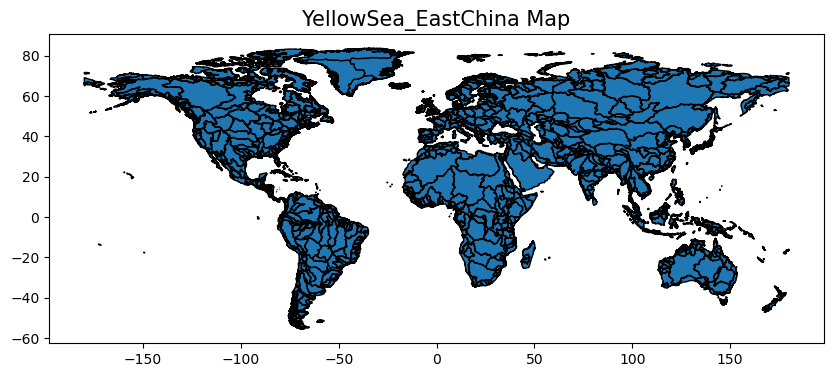

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 geojson 文件
file_path = r"D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson"  # 将此路径替换为你的文件路径
gdf = gpd.read_file(file_path)

# 绘制地图
gdf.plot(figsize=(10, 10), edgecolor='black')

# 添加标题
plt.title("YellowSea_EastChina Map", fontsize=15)
plt.show()

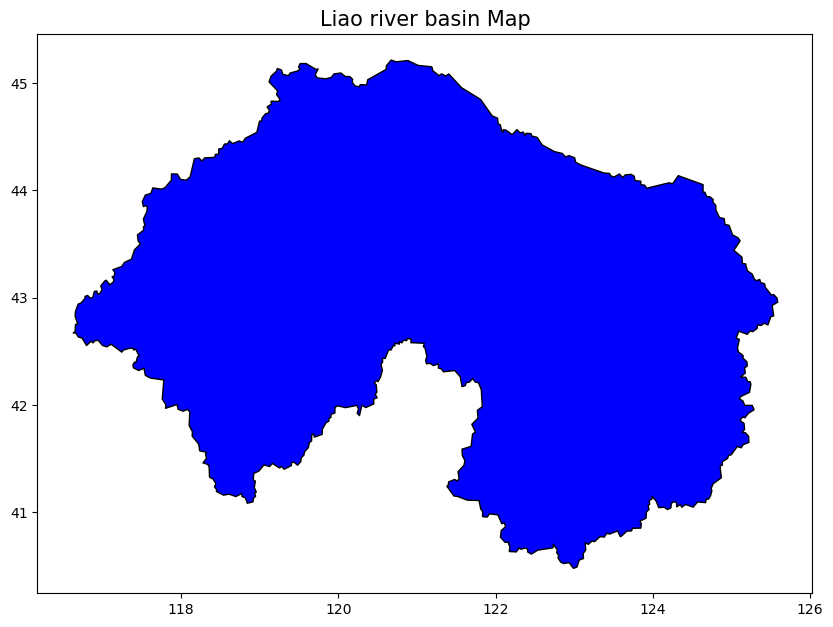

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 geojson 文件
file_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson'
gdf = gpd.read_file(file_path)
# print(gdf.head())
specific_basin_name = "Liao river basin"  # 替换为实际流域名称
# 筛选特定流域的数据
specific_basin_gdf = gdf[gdf['SUBREG_DES'] == specific_basin_name]
# 创建图表
fig, ax = plt.subplots(figsize=(10, 10))
# 绘制特定流域
specific_basin_gdf.plot(ax=ax, edgecolor='black', color='blue')
# 添加标题
plt.title(f"{specific_basin_name} Map", fontsize=15)
# 显示图表
plt.show()



In [31]:
import geopandas as gpd

# 读取 geojson 文件
file_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson'
gdf = gpd.read_file(file_path)

# 筛选特定流域的数据
specific_basin_name = "Liao river basin"  # 替换为实际流域名称
specific_basin_gdf = gdf[gdf['SUBREG_DES'] == specific_basin_name]

# 保存为 Shapefile
output_shapefile_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\Liao_river_basin.shp'
specific_basin_gdf.to_file(output_shapefile_path, driver='ESRI Shapefile')

print(f"Shapefile saved to {output_shapefile_path}")


Shapefile saved to D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\Liao_river_basin.shp


In [27]:
import geopandas as gpd

# 读取 geojson 文件
file_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson'
gdf = gpd.read_file(file_path)

# 检查 SUBREG_DES 字段中是否包含 "LIAO"
contains_liao = gdf['SUBREG_DES'].str.contains('LIAO', case=False, na=False)

# 显示包含 "LIAO" 的行
filtered_gdf = gdf[contains_liao]

# 打印包含 "LIAO" 的行数和部分内容
print(f"Number of entries containing 'LIAO': {filtered_gdf.shape[0]}")
print(filtered_gdf[['SUBREG_DES']].head())

Number of entries containing 'LIAO': 1
           SUBREG_DES
238  Liao river basin


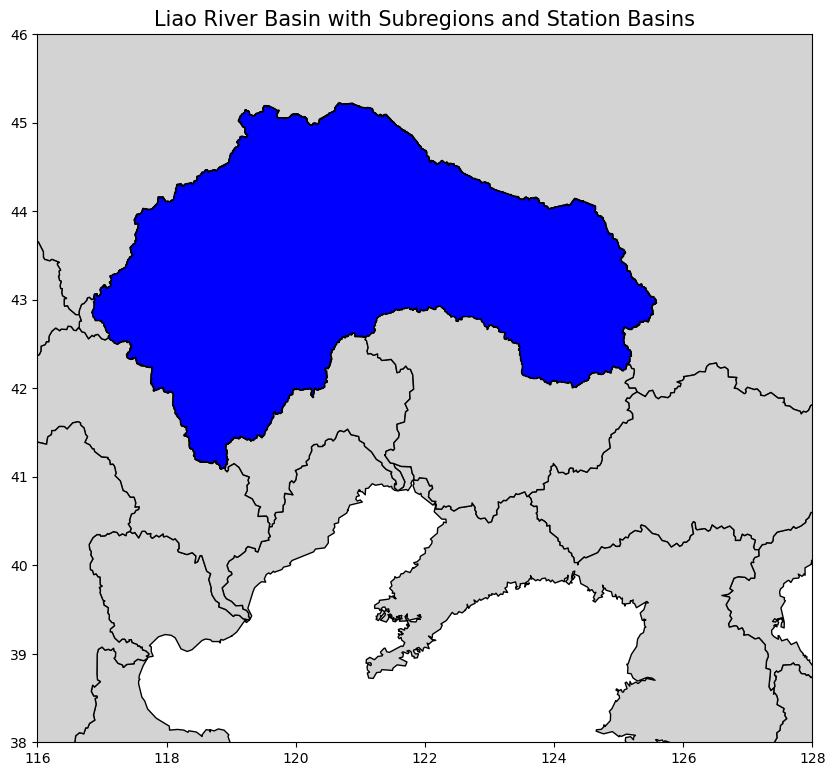

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 subregions 和 stationbasins 的 geojson 文件
subregions_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson'
stationbasins_path = r"D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_15-02\stationbasins.geojson"

# 读取 geojson 文件为 GeoDataFrame
gdf_subregions = gpd.read_file(subregions_path)
gdf_stationbasins = gpd.read_file(stationbasins_path)

# 创建图表
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制 subregions 的地图
gdf_subregions.plot(ax=ax, edgecolor='black', color='lightgray')

# 叠加 stationbasins 的地图
gdf_stationbasins.plot(ax=ax, edgecolor='black', color='blue')

# 设置地图显示的经纬度范围 (根据需要调整)
ax.set_xlim([116, 128])  # 设置经度范围
ax.set_ylim([38, 46])    # 设置纬度范围
# 添加标题
plt.title("Liao River Basin with Subregions and Station Basins", fontsize=15)

# 显示图表
plt.show()


Subregions CRS: EPSG:4326
Station Basins CRS: EPSG:4326


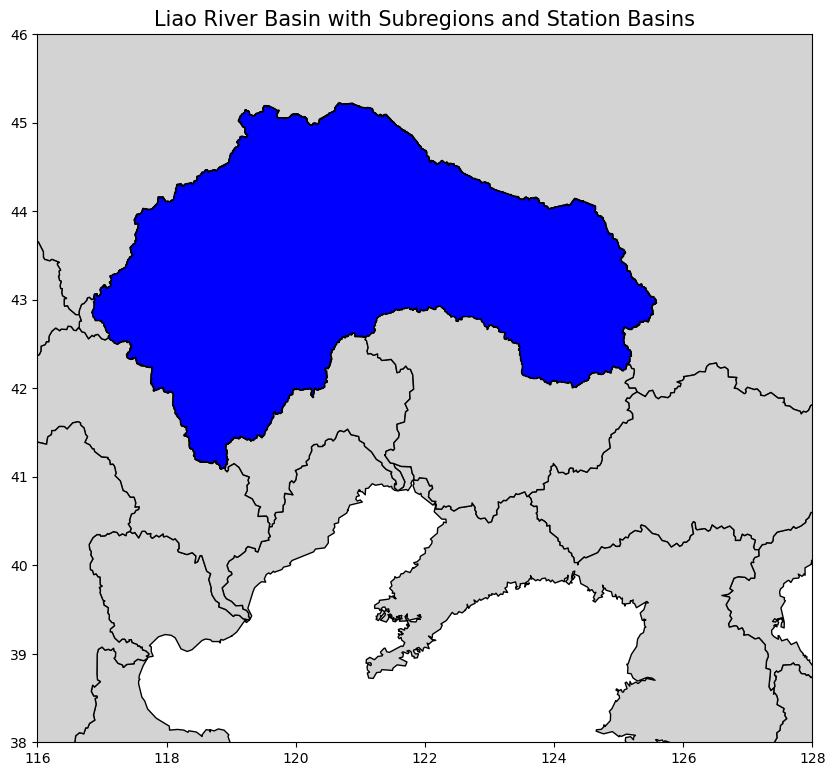

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 subregions 和 stationbasins 的 geojson 文件
subregions_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson'
stationbasins_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\stationbasins.geojson'

# 读取 geojson 文件为 GeoDataFrame
gdf_subregions = gpd.read_file(subregions_path)
gdf_stationbasins = gpd.read_file(stationbasins_path)

# 检查 CRS (Coordinate Reference System) 并进行转换
print("Subregions CRS:", gdf_subregions.crs)
print("Station Basins CRS:", gdf_stationbasins.crs)

# 假设所有数据应该使用 WGS 84 (EPSG:4326)
target_crs = "EPSG:4326"

# 如果 subregions 的 CRS 不一致，则转换
if gdf_subregions.crs != target_crs:
    gdf_subregions = gdf_subregions.to_crs(target_crs)

# 如果 stationbasins 的 CRS 不一致，则转换
if gdf_stationbasins.crs != target_crs:
    gdf_stationbasins = gdf_stationbasins.to_crs(target_crs)

# 创建图表
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制 subregions 的地图
gdf_subregions.plot(ax=ax, edgecolor='black', color='lightgray')

# 叠加 stationbasins 的地图
gdf_stationbasins.plot(ax=ax, edgecolor='black', color='blue')
# 设置地图显示的经纬度范围 (根据需要调整)
ax.set_xlim([116, 128])  # 设置经度范围
ax.set_ylim([38, 46])    # 设置纬度范围
# 添加标题
plt.title("Liao River Basin with Subregions and Station Basins", fontsize=15)

# 显示图表
plt.show()


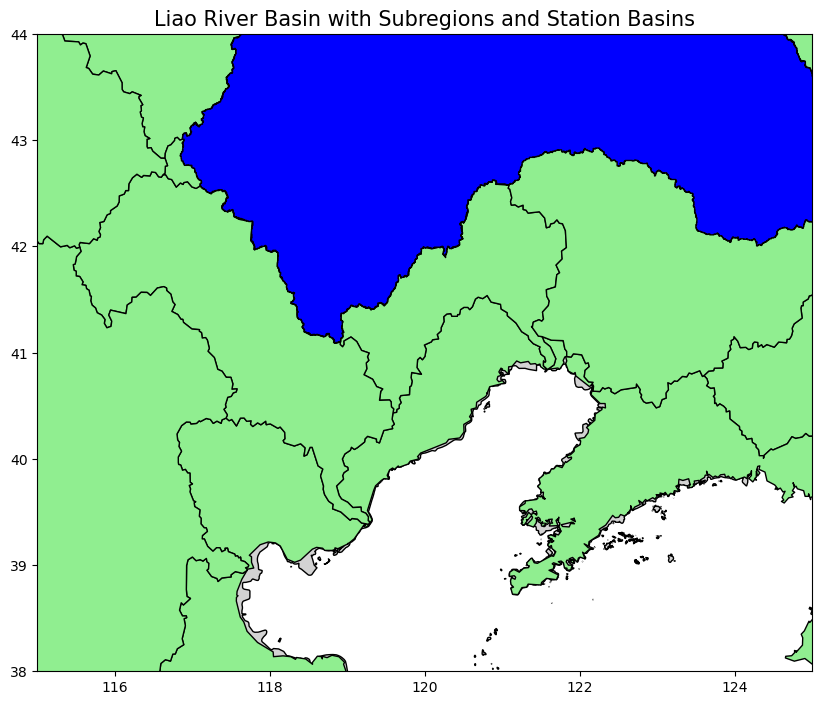

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 subregions 和 stationbasins 的 geojson 文件
subregions_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\subregions.geojson'
stationbasins_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\stationbasins.geojson'

# 读取中国地图 shapefile
china_map_path = r'D:\Data\China\ChinaAdminDivisonSHP-master\ChinaAdminDivisonSHP-master\1. Country\country.shp'
china_gdf = gpd.read_file(china_map_path)

# 读取 geojson 文件为 GeoDataFrame
gdf_subregions = gpd.read_file(subregions_path)
gdf_stationbasins = gpd.read_file(stationbasins_path)

# 创建图表
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制中国地图
china_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# 绘制 subregions 的地图
gdf_subregions.plot(ax=ax, edgecolor='black', color='lightgreen')

# 叠加 stationbasins 的地图
gdf_stationbasins.plot(ax=ax, edgecolor='black', color='blue')

# 设置地图显示的经纬度范围 (根据需要调整)
ax.set_xlim([115, 125])  # 设置经度范围
ax.set_ylim([38, 44])    # 设置纬度范围

# 添加标题
plt.title("Liao River Basin with Subregions and Station Basins", fontsize=15)

# 显示图表
plt.show()


In [8]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_bounds

# 读取 GeoJSON 文件
file_path = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\2024-08-24_14-53\stationbasins.geojson'
gdf = gpd.read_file(file_path)

# 定义输出 TIFF 文件路径
tiff_output = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\stationbasins.tif'

# 获取 GeoDataFrame 的边界
minx, miny, maxx, maxy = gdf.total_bounds

# 定义栅格的分辨率
pixel_size = 0.01  # 根据需要设置分辨率，例如每个像素代表0.01度

# 计算栅格的宽和高
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)

# 定义仿射变换（用于转换坐标到像素）
transform = from_bounds(minx, miny, maxx, maxy, width, height)

# 打开一个新的 rasterio dataset 来保存 GeoTIFF
with rasterio.open(
    tiff_output,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype='int32',  # 栅格的值类型可以根据需要调整
    crs=gdf.crs,    # 保持相同的坐标参考系统
    transform=transform,
) as dst:
    # 将矢量数据栅格化，区域内的值为1，mask区域为0
    shapes = ((geom, 1) for geom in gdf.geometry)  # 流域内的值为 1
    raster = rasterize(
        shapes,
        out_shape=(height, width),
        transform=transform,
        fill=0,   # 未覆盖的区域填充为 0 (mask)
        dtype='int32',
        all_touched=False  # 只栅格化与几何形状内部相交的像素
    )
    dst.write(raster, 1)

print("GeoTIFF 文件保存成功:", tiff_output)


GeoTIFF 文件保存成功: D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\stationbasins.tif


{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 874, 'height': 413, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.010001830663615551, 0.0, 116.8417,
       0.0, -0.010007990314769972, 45.2208)}


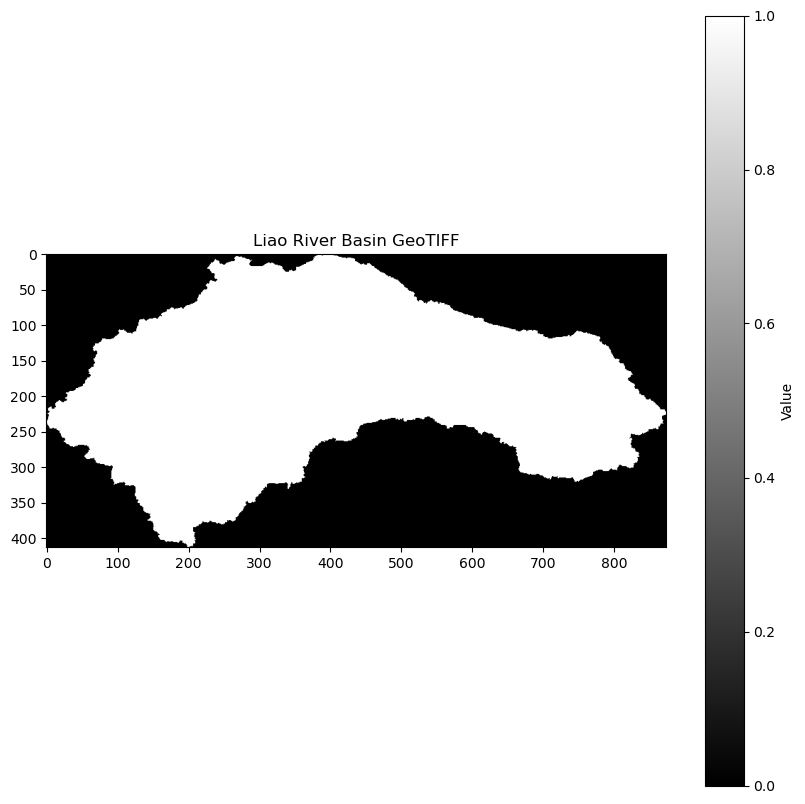

In [9]:
import rasterio
import matplotlib.pyplot as plt

# 打开 GeoTIFF 文件
tiff_output = r'D:\Data\GSOD\LiaoHe\GRDC\LIAO HE\stationbasins.tif'
with rasterio.open(tiff_output) as src:
    # 读取第一个波段的数据
    raster_data = src.read(1)
    
    # 获取栅格的元数据
    print(src.meta)

# 绘制栅格数据
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='gray')  # 使用灰度图显示
plt.colorbar(label='Value')
plt.title('Liao River Basin GeoTIFF')
plt.show()
